In [7]:
#SUCK PYTHON DATA IN AND CREATE FEATURE VECTORS

import json
import numpy
from pprint import pprint

with open('python_data/compDeriv/solutions.json') as solutions_file:    
    solutions = json.load(solutions_file)

with open('python_data/compDeriv/variables.json') as variables_file:    
    variables = json.load(variables_file)

#pprint(solutions)
#pprint(variables)
#pprint(solutions[100])
#pprint(solutions[1000])
#pprint(solutions[2000])
#pprint(solutions[3000])
num_of_solutions = len(solutions)
num_of_abstract_variables = len(variables)

print 'num_of_solutions, num_of_abstract_variables',num_of_solutions, num_of_abstract_variables
print 'example solution',solutions[0]

#iterate through solutions
feature_vectors = numpy.zeros((num_of_solutions,num_of_abstract_variables))
corpus_obj = []
for i, sol in enumerate(solutions):
    solution_sparse_vect_for_corpus = []
    #produce a feature vector of length = number of abstract variables
    #sol.append(numpy.zeros(num_of_abstract_variables))
    #print i, sol['number'], sol['variableIDs']
    feature_vector_for_sol_i = feature_vectors[i]
    for abstract_var_id in sol['variableIDs']:
        feature_vector_for_sol_i[abstract_var_id-1] = 1 #var_id is one-indexed; feature vector isn't
        solution_sparse_vect_for_corpus.append((abstract_var_id,1))
    corpus_obj.append(solution_sparse_vect_for_corpus)
    #print feature_vector_for_sol_i
    #break
print feature_vectors
#print feature_vectors.sum()
print 'solutions with each variable',feature_vectors.sum(axis=0,dtype='int')
print 'variables in each solution',feature_vectors.sum(axis=1,dtype='int')

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
projection = pca.fit_transform(feature_vectors)
print projection
print 'pca.explained_variance_ratio_',pca.explained_variance_ratio_


num_of_solutions, num_of_abstract_variables 3181 196
example solution {u'count': 1, u'lines': [{u'phraseID': 1, u'indent': 0}, {u'phraseID': 2, u'indent': 4}], u'number': u'0', u'phraseIDs': [1, 2], u'variableIDs': [1, 2], u'members': [u'0'], u'output': [4.0, 9.0]}
[[ 1.  1.  0. ...,  0.  0.  0.]
 [ 1.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 ..., 
 [ 0.  1.  1. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  0.  0.  0.]
 [ 0.  1.  1. ...,  0.  0.  0.]]
solutions with each variable [ 686 2778  856  100 1503   27  297  304 1054   12  141  263  310  133  549
  208    3  266   26   30    4   43    5   15    1   66  150    3   10   60
  134   11   20    9   52   44    4    6    2    8    5    2   13   71    5
    4   63    5    2   34    1    1    9   23   13    3    2   12    4    8
    2    2   13    2    2    2   10    2    3    1    4    4    2    8    4
    6    2    6   27    1   16   24   31    3    3    1    7    6    9    1
    1    4    7   12   10    2    5    4    5    

In [8]:
%matplotlib inline

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


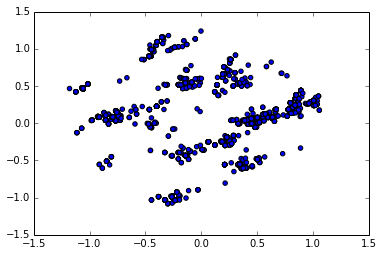

In [3]:

import matplotlib.pyplot as plt 

plt.figure()
plt.scatter(projection[:, 0], projection[:, 1])
plt.show()

# Next step: push in labeled data--labeled by error signature--from exams, see if we can predict rubric items!!!!!!

# Another step: pull out all templates for a given variable, and nearby variables in behavior-space, see if we can collapse variation

# Try LDA

In [9]:
corpus_obj

[[(1, 1), (2, 1)],
 [(1, 1), (2, 1)],
 [(3, 1), (4, 1)],
 [(2, 1)],
 [(2, 1), (3, 1), (5, 1)],
 [(8, 1), (6, 1), (7, 1)],
 [(8, 1), (6, 1), (7, 1)],
 [(8, 1), (6, 1), (7, 1)],
 [(9, 1), (2, 1), (10, 1), (5, 1)],
 [(9, 1), (2, 1), (11, 1), (5, 1)],
 [(9, 1), (2, 1), (12, 1), (5, 1)],
 [(9, 1), (2, 1), (13, 1), (14, 1), (15, 1)],
 [(9, 1), (2, 1), (5, 1), (1, 1)],
 [(9, 1), (2, 1), (14, 1), (15, 1)],
 [(9, 1), (2, 1), (5, 1)],
 [(8, 1), (1, 1), (2, 1)],
 [(16, 1), (1, 1), (2, 1), (7, 1)],
 [(9, 1), (2, 1), (5, 1), (15, 1)],
 [(9, 1), (2, 1), (17, 1), (5, 1), (15, 1)],
 [(2, 1), (3, 1), (18, 1)],
 [(9, 1), (2, 1), (3, 1), (5, 1), (13, 1)],
 [(1, 1), (2, 1), (5, 1)],
 [(19, 1)],
 [(1, 1), (2, 1), (5, 1)],
 [(4, 1), (15, 1)],
 [(2, 1), (20, 1)],
 [(2, 1), (3, 1), (14, 1)],
 [(1, 1), (2, 1), (5, 1)],
 [(21, 1), (22, 1)],
 [(21, 1), (22, 1)],
 [(1, 1), (2, 1), (5, 1)],
 [(8, 1), (1, 1), (2, 1), (23, 1)],
 [(16, 1), (2, 1)],
 [(1, 1), (2, 1), (5, 1)],
 [(9, 1), (2, 1), (5, 1), (15, 1)],
 [(24,

In [10]:
from gensim import corpora, models, similarities
tfidf = models.TfidfModel(corpus_obj)

ImportError: No module named gensim

In [13]:
# Elena's implementation of LDA

#based loosely on https://gist.github.com/mblondel/542786

import numpy as np
import scipy as sp
from scipy.special import gammaln

#Just some initialization; these can be changed, of course
n_topics = 10
alpha = 0.1
beta = 0.1
maxiteration = 10

#a matrix of #docs vs. #vocab
#doc_matrix = np.matrix('1 2; 3 4') #TODO: REPLACE WITH FAUX DATA
n_docs, n_words = doc_matrix.shape


##Initialization
n_dz = np.zeros((n_docs,n_topics))
n_zw = np.zeros((n_topics,n_words))

n_d = np.zeros(n_docs)
n_z = np.zeros(n_topics)

topics = {}

for d in xrange(n_docs):
    non_empty_words = [word_index for word_index in doc_matrix[d,:] if word_index != -1]
    print non_empty_words
    for w in non_empty_words:
        for w in n_vocab:
            z = np.random.randint(n_topics)
            n_dz[d,z] += 1
            n_d[d] += 1
            n_zw[z,w] += 1
            n_z += 1
            topics[(d,w)] = z

def conditional_dist(d,w,n_zw,n_z,n_dz,n_d):
    global alpha
    global beta

    n_words = n_zw.shape[1]

    #todo: understand this formula better
    numerator1 = n_zw[:,w] + beta #
    denominator1 = n_z + beta*n_words

    numerator2 = n_dz[d,:] + alpha
    denominator2 = n_d + alpha*n_words

    p_z = numerator1/denominator1 * numerator2/denominator2
    p_z /= np.sum(p_z)

    return p_z

##Run Gibbs
for iteration in xrange(maxiteration):
    for d in xrange(n_docs):
        for w in [word_index for word_index in doc_matrix[d,:] if word_index != -1]:
            z = topics[(d,w)]

            #remove assignment
            n_dz[d,z] -= 1
            n_d[d] -= 1
            n_zw[z,w] -= 1
            n_z -= 1

            #compute probability over topics of held-out assignment
            p_z = conditional_dist(d,w,n_zw,n_z,n_dz,n_d)

            #get new assignment by sampling from p_z
            z = np.random.multinomial(1,p_z).argmax()

            #add new assignment in the place of the old assignment
            n_dz[d,z] += 1
            n_d[d] += 1
            n_zw[z,w] += 1
            n_z += 1


#grabbed straight from https://gist.github.com/mblondel/542786 for testing:

N_TOPICS = 10
DOCUMENT_LENGTH = 100


def sample_index(p):
    """
    Sample from the Multinomial distribution and return the sample index.
    """
    return np.random.multinomial(1,p).argmax()

def gen_word_distribution(n_topics, document_length):
    """
    Generate a word distribution for each of the n_topics.
    """
    width = n_topics / 2
    vocab_size = width ** 2
    m = np.zeros((n_topics, vocab_size))

    for k in range(width):
        m[k,:] = vertical_topic(width, k, document_length)

    for k in range(width):
        m[k+width,:] = horizontal_topic(width, k, document_length)

    m /= m.sum(axis=1)[:, np.newaxis] # turn counts into probabilities

    return m

def gen_document(word_dist, n_topics, vocab_size, length=DOCUMENT_LENGTH, alpha=0.1):
    """
    Generate a document:
        1) Sample topic proportions from the Dirichlet distribution.
        2) Sample a topic index from the Multinomial with the topic
           proportions from 1).
        3) Sample a word from the Multinomial corresponding to the topic
           index from 2).
        4) Go to 2) if need another word.
    """
    theta = np.random.mtrand.dirichlet([alpha] * n_topics)
    v = np.zeros(vocab_size)
    for n in range(length):
        z = sample_index(theta)
        w = sample_index(word_dist[z,:])
        v[w] += 1
    return v

def gen_documents(word_dist, n_topics, vocab_size, n=500):
    """
    Generate a document-term matrix.
    """
    m = np.zeros((n, vocab_size))
    for i in xrange(n):
        m[i, :] = gen_document(word_dist, n_topics, vocab_size)
    return m

width = N_TOPICS / 2
vocab_size = width ** 2
word_dist = gen_word_distribution(N_TOPICS, DOCUMENT_LENGTH)
matrix = gen_documents(word_dist, N_TOPICS, vocab_size)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()